{'V_1': 1.0, 'theta_1': 0.0, 'V_2': 1.0, 'theta_2': 0.0, 'omega_coi': 1.0, 'omega_1': 1.0, 'e1q_1': 1.0, 'i_q_1': 0.5, 'omega_2': 1.0}


FileNotFoundError: [Errno 2] No such file or directory: 'pv_dashboard.svg'

<Figure size 640x480 with 0 Axes>

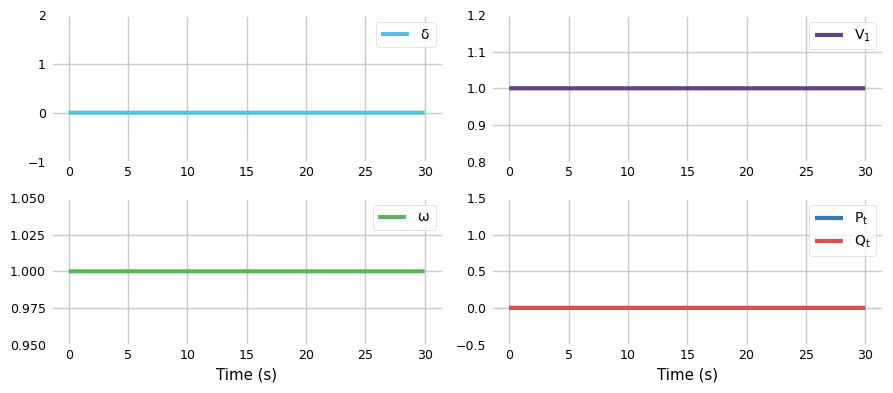

In [2]:
from pydae.bmapu import bmapu_builder
from IPython.display import SVG

data = {
"system":{"name":"smib","S_base":100e6, "K_p_agc":0.0,"K_i_agc":0.0,"K_xif":0.01},       
"buses":[{"name":"1", "P_W":0.0,"Q_var":0.0,"U_kV":20.0},
         {"name":"2", "P_W":0.0,"Q_var":0.0,"U_kV":20.0}
        ],
"lines":[{"bus_j":"1", "bus_k":"2", "X_pu":0.05,"R_pu":0.01,"Bs_pu":1e-6,"S_mva":100.0}],
"syns":[
      {"bus":"1","S_n":200e6,
         "X_d":1.8,"X1d":0.3, "T1d0":8.0,    
         "X_q":1.7,"X1q":0.55,"T1q0":0.4,  
         "R_a":0.01,"X_l": 0.2, 
         "H":5.0,"D":1.0,
         "Omega_b":314.1592653589793,"omega_s":1.0,"K_sec":0.0,
         "K_delta":0.0}],
"genapes":[{"bus":"2","S_n":1e9,"F_n":50.0,"X_v":0.001,"R_v":0.0,"K_delta":0.001,"K_alpha":1e-6}]
}
grid = bmapu_builder.bmapu(data)
grid.checker()
grid.uz_jacs = True
grid.build('smib')

from pydae.edashboards.smib.smib_module_2 import dashboard
import smib

model = smib.model()
db = dashboard(model)

In [2]:
from pydae.edashboards.smib.smib_module_2 import dashboard
import smib

model = smib.model()
db = dashboard(model)
db.show()